# Using PySAL

PySAL, the Python Spatial Analysis Library, is a pure python package for spatial data manipulation and analysis. 

First off, know that this demonstration will be *limited*, and that even the official PySAL [notebook repository](https://github.com/pysal/notebooks) is similarly limited in scope. The library can do so much, it's important to acknowledge that the sum of the teaching material about it really only covers the most common usages. 

We'll be discussing file input and outupt first, then discussing the basic spatial statistical functions, and briefly covering the interface between `PySAL` and `Shapely`. 

## Shapefiles

Like we discussed in the intro, interfaces to files in python usually have the following structure:

        path = 'example/file/path'
        file_pointer = open(path)
        contents = file_pointer.read()

Here in PySAL, this is no different. First, we'll use the `pysal.examples.get_path()` function to dynamically grab our file paths. We're using this function because everyones' computers are different, and this function will simply blindly generate the filepath for the file in question. 

First, we'll open a shapefile. 

In [54]:
import pysal

In [55]:
pysal.examples.get_path('columbus.shp')

'/usr/local/lib/python2.7/dist-packages/pysal/examples/columbus.shp'

In [56]:
path = pysal.examples.get_path('columbus.shp')
print path; print type(path)

/usr/local/lib/python2.7/dist-packages/pysal/examples/columbus.shp
<type 'str'>


In [57]:
shp = pysal.open(path)

In [58]:
shp

Importantly, you can do some things, like examine the bounding box of the map, without reading in all the elements yourself:

In [59]:
shp.header

{'BBOX Mmax': 0.0,
 'BBOX Mmin': 0.0,
 'BBOX Xmax': 11.287420272827148,
 'BBOX Xmin': 5.87490701675415,
 'BBOX Ymax': 14.742449760437012,
 'BBOX Ymin': 10.788629531860352,
 'BBOX Zmax': 0.0,
 'BBOX Zmin': 0.0,
 'File Code': 9994,
 'File Length': 10990,
 'Shape Type': 5,
 'Unused0': 0,
 'Unused1': 0,
 'Unused2': 0,
 'Unused3': 0,
 'Unused4': 0,
 'Version': 1000}

In [60]:
shp.bbox

[5.87490701675415, 10.788629531860352, 11.287420272827148, 14.742449760437012]

For geometry data, pysal decomposes shapes into `Polygons`, `Points`, `Lines`, `Rays`, etc. These geometric primitives then have their information contained within them. We'll be working with polygon data. 

In [61]:
shape = shp[0]

In [62]:
shape.parts

[[(8.624129295349121, 14.236980438232422),
  (8.559700012207031, 14.742449760437012),
  (8.809452056884766, 14.734430313110352),
  (8.808412551879883, 14.636520385742188),
  (8.919304847717285, 14.638500213623047),
  (9.087138175964355, 14.63049030303955),
  (9.09996509552002, 14.244830131530762),
  (9.015047073364258, 14.241840362548828),
  (9.008951187133789, 13.995059967041016),
  (8.818140029907227, 14.002050399780273),
  (8.653305053710938, 14.008090019226074),
  (8.642902374267578, 14.089710235595703),
  (8.63259220123291, 14.1705904006958),
  (8.625825881958008, 14.22367000579834),
  (8.624129295349121, 14.236980438232422)]]

In [63]:
shape.parts

[[(8.624129295349121, 14.236980438232422),
  (8.559700012207031, 14.742449760437012),
  (8.809452056884766, 14.734430313110352),
  (8.808412551879883, 14.636520385742188),
  (8.919304847717285, 14.638500213623047),
  (9.087138175964355, 14.63049030303955),
  (9.09996509552002, 14.244830131530762),
  (9.015047073364258, 14.241840362548828),
  (9.008951187133789, 13.995059967041016),
  (8.818140029907227, 14.002050399780273),
  (8.653305053710938, 14.008090019226074),
  (8.642902374267578, 14.089710235595703),
  (8.63259220123291, 14.1705904006958),
  (8.625825881958008, 14.22367000579834),
  (8.624129295349121, 14.236980438232422)]]

In [64]:
print shape.area; print shape.perimeter

0.309439780723
2.44061639469


We'll use these later to build the shape geometries in shapely. 

### Problem: Figuring out shapes

We're used to iterating over collections of simple objects, like `[1,2,4,15,3.4,2]`. When we iterate over more complex collections it's good to keep in mind what is being substituted for the `item` in our classic iterator expression `for item in collection:`.

1. If you iterate through the entire shapefile `shp`, what kind of object is `item`? (*note, use the `type` function*)
2. Polygons have a few methods that we haven't discussed. Using a list comprehension, get a list of tuples containing a polygon's ID and Centroid. 
3. Say we're looking for shapes that may contain the point (9, 13). Using some method of the polygon objects in `shp`, find the shapes that may contain this point.

In [65]:
for element in shp:
    print type(element)

<class 'pysal.cg.shapes.Polygon'>
<class 'pysal.cg.shapes.Polygon'>
<class 'pysal.cg.shapes.Polygon'>
<class 'pysal.cg.shapes.Polygon'>
<class 'pysal.cg.shapes.Polygon'>
<class 'pysal.cg.shapes.Polygon'>
<class 'pysal.cg.shapes.Polygon'>
<class 'pysal.cg.shapes.Polygon'>
<class 'pysal.cg.shapes.Polygon'>
<class 'pysal.cg.shapes.Polygon'>
<class 'pysal.cg.shapes.Polygon'>
<class 'pysal.cg.shapes.Polygon'>
<class 'pysal.cg.shapes.Polygon'>
<class 'pysal.cg.shapes.Polygon'>
<class 'pysal.cg.shapes.Polygon'>
<class 'pysal.cg.shapes.Polygon'>
<class 'pysal.cg.shapes.Polygon'>
<class 'pysal.cg.shapes.Polygon'>
<class 'pysal.cg.shapes.Polygon'>
<class 'pysal.cg.shapes.Polygon'>
<class 'pysal.cg.shapes.Polygon'>
<class 'pysal.cg.shapes.Polygon'>
<class 'pysal.cg.shapes.Polygon'>
<class 'pysal.cg.shapes.Polygon'>
<class 'pysal.cg.shapes.Polygon'>
<class 'pysal.cg.shapes.Polygon'>
<class 'pysal.cg.shapes.Polygon'>
<class 'pysal.cg.shapes.Polygon'>
<class 'pysal.cg.shapes.Polygon'>
<class 'pysal.

In [66]:
results = []
for item in shp:
    results.append((item.id, item.centroid))
results

[(1, (8.827218469203899, 14.369076018912049)),
 (2, (8.332658372724943, 14.031624006323977)),
 (3, (9.012265409371706, 13.819719079969202)),
 (4, (8.460800893307436, 13.716962170228117)),
 (5, (9.007982127497668, 13.296366430537311)),
 (6, (9.739925828001203, 13.474632743210663)),
 (7, (8.11875006062871, 13.295703867053506)),
 (8, (8.496488171957564, 13.402612361972402)),
 (9, (9.630793442508978, 12.942724931765394)),
 (10, (10.366382709801035, 13.001889360253092)),
 (11, (8.669735412857024, 12.980121561233249)),
 (12, (8.544995589641758, 12.953125683982284)),
 (13, (8.349223482851091, 12.99609414110248)),
 (14, (8.292701516920962, 12.863707688216877)),
 (15, (8.973462206070076, 12.741586740380432)),
 (16, (8.65586633556042, 12.627315808754112)),
 (17, (10.528621192777125, 12.64747559705899)),
 (18, (8.487918125725216, 12.545342471590114)),
 (19, (8.312367703365659, 12.666720813263007)),
 (20, (10.190581526179404, 12.256899149288603)),
 (21, (7.847423618980441, 12.084997322022756)),
 (

In [67]:
[(item.id, item.centroid) for item in shp]

[(1, (8.827218469203899, 14.369076018912049)),
 (2, (8.332658372724943, 14.031624006323977)),
 (3, (9.012265409371706, 13.819719079969202)),
 (4, (8.460800893307436, 13.716962170228117)),
 (5, (9.007982127497668, 13.296366430537311)),
 (6, (9.739925828001203, 13.474632743210663)),
 (7, (8.11875006062871, 13.295703867053506)),
 (8, (8.496488171957564, 13.402612361972402)),
 (9, (9.630793442508978, 12.942724931765394)),
 (10, (10.366382709801035, 13.001889360253092)),
 (11, (8.669735412857024, 12.980121561233249)),
 (12, (8.544995589641758, 12.953125683982284)),
 (13, (8.349223482851091, 12.99609414110248)),
 (14, (8.292701516920962, 12.863707688216877)),
 (15, (8.973462206070076, 12.741586740380432)),
 (16, (8.65586633556042, 12.627315808754112)),
 (17, (10.528621192777125, 12.64747559705899)),
 (18, (8.487918125725216, 12.545342471590114)),
 (19, (8.312367703365659, 12.666720813263007)),
 (20, (10.190581526179404, 12.256899149288603)),
 (21, (7.847423618980441, 12.084997322022756)),
 (

In [68]:
q = shp[0]

In [69]:
type(q)

pysal.cg.shapes.Polygon

In [70]:
pt = (9,13)

In [71]:
q.contains_point(pt)

0

In [72]:
0 == False

True

In [73]:
q.contains_point?

In [74]:
for item in shp:
    if item.contains_point(pt) == 1:
        print item.id

5


In [75]:
[item.id for item in shp if item.contains_point(pt)]

[5]

### Problem: Clipping new shapes

`PySAL` can write shapefiles in addition to reading them. I've opened and primed a new file for writing. Write only the first five polygons to a new file called `columbus_head.shp`.

## DBF Files

Now, let's open up the dbf associated with the shp we've opened. 

In [77]:
path

'/usr/local/lib/python2.7/dist-packages/pysal/examples/columbus.shp'

In [78]:
s = 'purple'

In [79]:
s.replace('le', 'purp')

'purppurp'

In [80]:
path = path.replace('.shp', '.dbf')

In [81]:
path

'/usr/local/lib/python2.7/dist-packages/pysal/examples/columbus.dbf'

In [82]:
dbf = pysal.open(path)

In [83]:
dbf

DataTable: /usr/local/lib/python2.7/dist-packages/pysal/examples/columbus.dbf

Just like the shape object discussed above, this is a link to the overall *file*, not the contents. If we wanted to read the entire table into memory, we could use `dbf.read()`. But, we won't do that. If you try this, remember that, for anything operating like typical python, using any `.read()` function empties out the file object. You'll have to rerun the cells above where we load the dbf.

So, if we don't want to read the entire table into memory, how do we access attributes?

In [84]:
dbf.header

['AREA',
 'PERIMETER',
 'COLUMBUS_',
 'COLUMBUS_I',
 'POLYID',
 'NEIG',
 'HOVAL',
 'INC',
 'CRIME',
 'OPEN',
 'PLUMB',
 'DISCBD',
 'X',
 'Y',
 'NSA',
 'NSB',
 'EW',
 'CP',
 'THOUS',
 'NEIGNO']

In [85]:
dbf.by_col('CRIME')

[15.72598,
 18.801754,
 30.626781,
 32.38776,
 50.73151,
 26.066658,
 0.178269,
 38.425858,
 30.515917,
 34.000835,
 62.275448,
 56.705669,
 46.716129,
 57.066132,
 48.585487,
 54.838711,
 36.868774,
 43.962486,
 54.521965,
 0.223797,
 40.074074,
 33.705048,
 20.048504,
 38.297871,
 61.299175,
 40.969742,
 52.79443,
 56.919785,
 60.750446,
 68.892044,
 17.677214,
 19.145592,
 41.968163,
 23.974028,
 39.175053,
 14.305556,
 42.445076,
 53.710938,
 19.100863,
 16.241299,
 18.905146,
 16.49189,
 36.663612,
 25.962263,
 29.028488,
 16.530533,
 27.822861,
 26.645266,
 22.541491]

In [86]:
dbf.field_spec

[('N', 13, 6),
 ('N', 13, 6),
 ('N', 11, 0),
 ('N', 11, 0),
 ('N', 16, 0),
 ('N', 2, 0),
 ('N', 9, 6),
 ('N', 9, 6),
 ('N', 9, 6),
 ('N', 9, 6),
 ('N', 9, 6),
 ('N', 8, 6),
 ('N', 9, 6),
 ('N', 9, 6),
 ('N', 8, 6),
 ('N', 8, 6),
 ('N', 8, 6),
 ('N', 8, 6),
 ('N', 11, 6),
 ('N', 11, 6)]

In [87]:
type(col)

NameError: name 'col' is not defined

In [ ]:
col

And, we can do this by rows, too:

In [ ]:
dbf.by_row(4)

### Problem: Hello Pandas, My Old Friend

Using the dbf table's `by_col` and `header`, construct a Pandas dataframe from the dbf. 

In [88]:
import pandas

In [89]:
df = pandas.DataFrame()

In [90]:
for field in dbf.header:
    df[field] = pandas.Series(dbf.by_col(field))

In [91]:
pandas.DataFrame({field:dbf.by_col(field) for field in dbf.header})

,AREA,COLUMBUS_,COLUMBUS_I,CP,CRIME,DISCBD,EW,HOVAL,INC,NEIG,NEIGNO,NSA,NSB,OPEN,PERIMETER,PLUMB,POLYID,THOUS,X,Y
0,0.309441,2,5,0,15.725980,5.03,1,80.467003,19.531000,5,1005,1,1,2.850747,2.440629,0.217155,1,1000,38.799999,44.070000
1,0.259329,3,1,0,18.801754,4.27,0,44.567001,21.232000,1,1001,1,1,5.296720,2.236939,0.320581,2,1000,35.619999,42.380001
2,0.192468,4,6,0,30.626781,3.89,1,26.350000,15.956000,6,1006,1,1,4.534649,2.187547,0.374404,3,1000,39.820000,41.180000
3,0.083841,5,2,0,32.387760,3.70,0,33.200001,4.477000,2,1002,1,1,0.394427,1.427635,1.186944,4,1000,36.500000,40.520000
4,0.488888,6,7,0,50.731510,2.83,1,23.225000,11.252000,7,1007,1,1,0.405664,2.997133,0.624596,5,1000,40.009998,38.000000
5,0.283079,7,8,0,26.066658,3.78,1,28.750000,16.028999,8,1008,1,1,0.563075,2.335634,0.254130,6,1000,43.750000,39.279999
6,0.257084,8,4,0,0.178269,2.74,0,75.000000,8.438000,4,1004,1,1,0.000000,2.554577,2.402402,7,1000,33.360001,38.410000
7,0.204954,9,3,0,38.425858,2.89,0,37.125000,11.337000,3,1003,1,1,3.483478,2.139524,2.739726,8,1000,36.709999,38.709999
8,0.500755,10,18,0,30.515917,3.17,1,52.599998,17.586000,18,1018,1,1,0.527488,3.169707,0.890736,9,1000,43.439999,35.919998
9,0.246689,11,10,0,34.000835,4.33,1,96.400002,13.598000,10,1010,1,1,1.548348,2.087235,0.557724,10,1000,47.610001,36.419998


In [92]:
df

,AREA,PERIMETER,COLUMBUS_,COLUMBUS_I,POLYID,NEIG,HOVAL,INC,CRIME,OPEN,PLUMB,DISCBD,X,Y,NSA,NSB,EW,CP,THOUS,NEIGNO
0,0.309441,2.440629,2,5,1,5,80.467003,19.531000,15.725980,2.850747,0.217155,5.03,38.799999,44.070000,1,1,1,0,1000,1005
1,0.259329,2.236939,3,1,2,1,44.567001,21.232000,18.801754,5.296720,0.320581,4.27,35.619999,42.380001,1,1,0,0,1000,1001
2,0.192468,2.187547,4,6,3,6,26.350000,15.956000,30.626781,4.534649,0.374404,3.89,39.820000,41.180000,1,1,1,0,1000,1006
3,0.083841,1.427635,5,2,4,2,33.200001,4.477000,32.387760,0.394427,1.186944,3.70,36.500000,40.520000,1,1,0,0,1000,1002
4,0.488888,2.997133,6,7,5,7,23.225000,11.252000,50.731510,0.405664,0.624596,2.83,40.009998,38.000000,1,1,1,0,1000,1007
5,0.283079,2.335634,7,8,6,8,28.750000,16.028999,26.066658,0.563075,0.254130,3.78,43.750000,39.279999,1,1,1,0,1000,1008
6,0.257084,2.554577,8,4,7,4,75.000000,8.438000,0.178269,0.000000,2.402402,2.74,33.360001,38.410000,1,1,0,0,1000,1004
7,0.204954,2.139524,9,3,8,3,37.125000,11.337000,38.425858,3.483478,2.739726,2.89,36.709999,38.709999,1,1,0,0,1000,1003
8,0.500755,3.169707,10,18,9,18,52.599998,17.586000,30.515917,0.527488,0.890736,3.17,43.439999,35.919998,1,1,1,0,1000,1018
9,0.246689,2.087235,11,10,10,10,96.400002,13.598000,34.000835,1.548348,0.557724,4.33,47.610001,36.419998,1,1,1,0,1000,1010


### Quick and Dirty Visualization

Just as an aside, if you want to view your data, there are currently two good options in PySAL to do this. First is the `matplotlib` pysal visualization package. 

In [93]:
from pysal.contrib.viz import mapping as mplviz
import numpy
%matplotlib inline

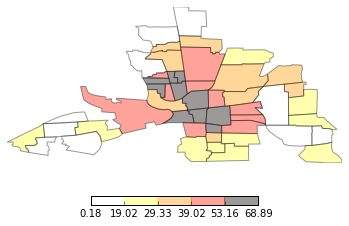

In [94]:
mplviz.plot_choropleth(path.replace('dbf', 'shp'), 
                       numpy.array(dbf.by_col('CRIME')), 
                       'quantiles')

Let's dissect what's going on in that function call. First, we pass some path to a shapefile. Since we replaced `.shp` with `.dbf` above, we have to flip the path back to the shapefile. Second, we need to pass the function a thing to map. Unfortunately, we can't just pass a list; the function expects a `numpy array`. For now, it's enough to know that you can turn any list (or list of list, or tuple) into an array. Lastly, we have to give the type of classification scheme to map. 

Another solution in the next version of PySAL involves using [`folium`](https://github.com/python-visualization/folium). I don't believe the lab computers come installed with folium, but I'll show you what this looks like. 

In [95]:
import folium_mapping as oneshot
import geojson

This solution works by converting a dbf+shp pair into [GeoJSON](https://geojson.org), and then mapping that using builtin support for GeoJSON in folium. For this example, we'll use some data with real spatial reference.  

In [96]:
pysal.open(pysal.examples.get_path('sacramentot2.dbf')).header

['FIPS',
 'MSA',
 'TOT_POP',
 'POP_16',
 'POP_65',
 'WHITE_',
 'BLACK_',
 'ASIAN_',
 'HISP_',
 'MULTI_RA',
 'MALES',
 'FEMALES',
 'MALE1664',
 'FEM1664',
 'EMPL16',
 'EMP_AWAY',
 'EMP_HOME',
 'EMP_29',
 'EMP_30',
 'EMP16_2',
 'EMP_MALE',
 'EMP_FEM',
 'OCC_MAN',
 'OCC_OFF1',
 'OCC_INFO',
 'HH_INC',
 'POV_POP',
 'POV_TOT',
 'HSG_VAL',
 'FIPSNO',
 'POLYID']

In [97]:
path = pysal.examples.get_path('sacramentot2')

In [98]:
out = open('example.json', 'w')
geojson.dump(oneshot.build_features(pysal.open(path + '.shp'), pysal.open(path + '.dbf')), out)
out.close()

In [99]:
oneshot.choropleth_map('example.json', 'POLYID', 'EMPL16')

To dissect, we're converting the file from its current shp+dbf format to JSON first, then saving the JSON to disk. After we've converted the data, we're then using that data to map directly. If we wanted to tweak and save the figure, we could:

In [100]:
oneshot.choropleth_map('example.json', 
                       'POLYID', 'EMP_30',
                       tiles='Stamen Toner',
                       fill_color='BuPu', save=True)

### Weights & Moran's I

We've taught quite a few spatial statistics courses in this program, and most of the statistics have relied on some kind of spatial weights matrix describing how items in a map relate to one another. To make this in PySAL, we can use the builtin `queen_from_shapefile` or `rook_from_shapefile` functions. 

In [101]:
W = pysal.rook_from_shapefile(path + '.shp')

In [102]:
W?

The `W` object in pysal has many different methods and attributes that make it easy to summarize data. The easiest to understand functions are ones like `neighbors`, that returns a dictionary with keys of the polygon IDs and values a list of polygon IDs that correspond to polygons in the map. 

In [103]:
W.neighbors

{0: [1, 2, 3, 4, 6, 7, 8, 9],
 1: [0, 2, 3, 5],
 2: [0, 1, 5],
 3: [0, 1, 5, 6],
 4: [0, 5, 8, 9, 11, 15, 17, 26, 27, 28],
 5: [1, 2, 3, 4, 6, 7, 8, 10],
 6: [0, 3, 5, 7],
 7: [0, 8, 5, 6],
 8: [0, 4, 5, 7],
 9: [0, 11, 4],
 10: [33, 5, 43, 15, 19, 24, 25, 29],
 11: [9, 4, 13, 28],
 12: [32, 35, 38, 39, 14, 18],
 13: [16, 11],
 14: [32, 16, 12, 22, 28],
 15: [4, 10, 43, 17, 50, 51, 56],
 16: [28, 13, 14],
 17: [44, 26, 4, 53, 15],
 18: [64, 66, 35, 36, 39, 74, 12, 77, 80, 52, 68],
 19: [10, 20, 21, 23, 24, 25],
 20: [19, 21],
 21: [25, 19, 20],
 22: [32, 27, 28, 37, 14],
 23: [24, 25, 19],
 24: [33, 10, 19, 23],
 25: [33, 10, 43, 19, 21, 23, 29],
 26: [32, 34, 4, 42, 44, 17, 58, 27, 60, 93],
 27: [34, 4, 37, 22, 26, 28],
 28: [4, 11, 14, 16, 22, 27],
 29: [25, 10, 33],
 30: [188, 69, 31],
 31: [69, 30, 55],
 32: [34, 37, 38, 41, 42, 12, 14, 22, 26],
 33: [24, 25, 10, 29],
 34: [32, 26, 27, 37],
 35: [36, 18, 12, 39],
 36: [18, 35],
 37: [32, 34, 27, 22],
 38: [32, 39, 40, 41, 12, 46],


In [104]:
W.mean_neighbors #also helpful

5.2803970223325063

Pretty much any spatial statistical function in PySAL requires a `W`. To compute a univariate Moran's I statistic, we would do the following:

In [105]:
import numpy

In [106]:
dbf = pysal.open(path + '.dbf')

In [107]:
pysal.Moran?

In [108]:
numpy.array(dbf.by_col('EMP_30'))

array([1033,  159,  338,  165, 1684,   52,  101,   65,   58, 1076,  133,
        583, 1169,  807,  919,  680,  702, 1444,  557,  315,   20,  206,
        584,  338,  292,  378, 1290,  486,  720,  244,  685,  499, 1023,
        247,  805,  417, 1137,  558, 1502, 1174, 1687,  952, 1547,   20,
        777, 1120,  655,  394,  861,  629,  854,  457, 1174,  839,  492,
        643,  756,  808,  966, 1572, 1117,  325, 1312, 1006, 1076,  591,
        254, 1182, 2169,  183, 1655,  924,  906,  132,  874,  723,  425,
       1236,  623, 1221,  510, 2232, 2231, 1031, 1419,  431,  919,  727,
        858,  626, 1443,  976,  785, 1034,  554, 1088, 1687, 1105,  687,
        855, 1222,  706,  763, 1244,  409,  650,  581, 1038, 1740,  139,
        698,  385, 1759, 1144,  486,  918, 1031, 2075,  559,  522,  928,
       1285,  694, 1150,  630,  367,  802,  888,  967,  532,  470,  199,
       1040,  527,  586,   40,  418,  588, 1361,  643,  489,  903,  508,
        488,  913,  823,  655,  922,  599,  900,  6

In [109]:
Mo = pysal.Moran(numpy.array(dbf.by_col('EMP_30')), W)

Then, the Moran's I object has a few methods that you can use to understand the object:

In [110]:
Mo.I

0.40871631746624937

the `I` attribute is the value of the statistic.

In [111]:
Mo.p_sim

0.001

the `p_sim` value is the p-value over the number of simulations given by `permutations`

In [112]:
Mo.permutations

999

In general, learning how the spatial statistical objects in pysal work is very easy, and requires only a cursory read of the documentation. However, understanding *how* the statistic works and how to interpret is more subtle. Any `Moran`, `Moran_BV`, `Local_Moran`, or other ESDA function will be similar in arguments and methods. The spatial regression functions in `pysal.spreg` share design structure, too. 

### Problem: Dip a Toe in Spatial Stats

Using what we've covered so far, 

1. open up the `pysal` example 'columbus'. 
2. Compute a univariate Moran's I for the 'CRIME' and 'HOVAL' attriubtes. Are they clustered in space?
3. Compute a bivariate Moran's I for the two fields used above. Do high values of crime tend to cluster around high home values?
4. Compute a local Moran statistic on the Housing Values. What values are statistically significant?

## Bridge to Shapely

Pysal can be used as the data-management system for `Shapely`, a package dealing with computation of planar geometries. To read data into Shapely from PySAL, we can use the "GeoInterface" implemented by PySAL. 

First, we'll look at how to construct a shapely object from a pysal object:

In [113]:
shp = pysal.open(pysal.examples.get_path('sacramentot2.shp'))

Shapely implements all of its computational geometry objects in the submodule `geometry`. We'll import that now. 

In [114]:
import shapely.geometry as geom

Then, constructing a shape from a `PySAL` polygon is simple as pie:

In [115]:
shp[0]

In [116]:
piece = geom.shape(shp[0])

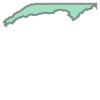

In [117]:
piece

You could build a whole map as a multipolygon, or get a list of all the shapes in the map:

In [118]:
shapes = [geom.shape(poly) for poly in shp]

In [119]:
shapes[0:5] #only printing the first five

In [120]:
Sacramento = geom.MultiPolygon([geom.shape(poly) for poly in shp])

As a warning, printing Sacramento won't work very well due to your browser's cache limitations. 

### Problem: GeoPandas? PandSAL!

GeoPandas provides a very fancy framework to work with spatial data using `OGR`. We can mimic its functionality without using `OGR` installed. 

1. Read in the `pysal` example `sacramentot2` dbf
2. Construct a `pandas` dataframe from the table. 
3. Add a series to the new dataframe called 'shapes' that contains the shapely polygons

You've now programmed a core functionality of geopandas using PySAL for the IO instead of Fiona/OGR. 

We'll talk more about the Shapely stuff later. For now, be satisfied with your newfound skills in Python GIS!

In [127]:
def geodf(fpath):
    fp_shp = pysal.open(fpath + '.shp')
    fp_dbf = pysal.open(fpath + '.dbf') 
    df = pandas.DataFrame({field: fp_dbf.by_col(field) for field in fp_dbf.header})
    df['shapes'] = pandas.Series(geom.shape(poly) for poly in fp_shp)
    return df

In [130]:
gdf = geodf(pysal.examples.get_path('sacramentot2'))